# Tesla Employee Reviews

How do Tesla employees feel about the future of the company?

Most insider information at pulicly traded companies is a jealously guarded secret. Insofar as such information is material to the operation of the business, the SEC also prohibits insiders from themselves trading off said information. However, there is one type of insider information that is public and potentially value-informative: employee reviews.

Glassdoor collects thousands of reviews on publicly traded business from employees both current and former. We can use these reviews to understand trends in employee sentiment about the future of their company.

### Data Collection

`python get_reviews.py` collects and stores glassdoor reviews in batches of 10. In this study we saved each review in a json file, but, we could just as easily store them in a database.

### Analysis

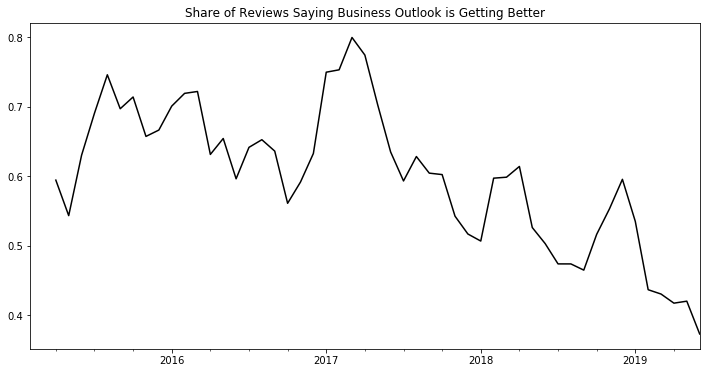

In [2]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

def clean_time(raw_time):
    return datetime.datetime.strptime(raw_time[0:19], "%Y-%m-%d %H:%M:%S")

with open('../data_collection/data/tesla_reviews.json') as json_file:
    tesla_reviews = json.load(json_file)
    
df_raw = pd.DataFrame(tesla_reviews['reviews'])

df = df_raw[['overallNumeric', 'businessOutlook']]\
    .assign(datetime_index = df_raw['reviewDateTime'].apply(clean_time))
    
df['dt_mon'] = df['datetime_index'].dt.to_period('M')

getting_better = df\
    .query('dt_mon > "2015-01"')\
    .query('dt_mon < "2019-07"')\
    [['dt_mon', 'businessOutlook', 'overallNumeric']]\
    .groupby(['dt_mon','businessOutlook'])\
    .agg('count')\
    .unstack()\
    .reset_index()

getting_better.columns = ['dt_mon', 'getting_better', 'getting_worse', 'no_change']
getting_better\
    .set_index('dt_mon')\
    .fillna(0)\
    .rolling(3)\
    .sum()\
    .assign(getting_better_share=lambda x: x['getting_better'] / (x['getting_better'] + x['getting_worse'] + x['no_change']))\
    [['getting_better_share']]\
    .plot(
        legend=False,
        figsize = (12,6),
        color='k',
)

plt.xlabel('')

plt.title('Share of Reviews Saying Business Outlook is Getting Better')
plt.show()

### Further Research

- What are the thematic trends in employee reviews?
- Which reviews, if any, should be excluded?
- Can employee reviews from competitor firms explain relative stock price performance?